In [2]:
import pandas as pd #To work with dataset
import numpy as np #Math library
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn

In [4]:
df_credit=pd.read_csv('german_credit_data.csv')

In [7]:
df_credit.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


In [8]:
df_credit.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [9]:
#Searching for Missings,type of data and also known the shape of data
print(df_credit.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
Unnamed: 0          1000 non-null int64
Age                 1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null int64
Housing             1000 non-null object
Saving accounts     817 non-null object
Checking account    606 non-null object
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
Risk                1000 non-null object
dtypes: int64(5), object(6)
memory usage: 86.0+ KB
None


In [10]:
#Looking unique values
print(df_credit.nunique())
#Looking the data
print(df_credit.head())

Unnamed: 0          1000
Age                   53
Sex                    2
Job                    4
Housing                3
Saving accounts        4
Checking account       3
Credit amount        921
Duration              33
Purpose                8
Risk                   2
dtype: int64
   Unnamed: 0  Age     Sex  Job Housing Saving accounts Checking account  \
0           0   67    male    2     own             NaN           little   
1           1   22  female    2     own          little         moderate   
2           2   49    male    1     own          little              NaN   
3           3   45    male    2    free          little           little   
4           4   53    male    2    free          little           little   

   Credit amount  Duration              Purpose  Risk  
0           1169         6             radio/TV  good  
1           5951        48             radio/TV   bad  
2           2096        12            education  good  
3           7882        42  fur

In [11]:
# it's a library that we work with plotly
import plotly.offline as py 
py.init_notebook_mode(connected=True) # this code, allow us to work with offline plotly version
import plotly.graph_objs as go # it's like "plt" of matplot
import plotly.tools as tls # It's useful to we get some tools of plotly
import warnings # This library will be used to ignore some warnings
from collections import Counter # To do counter of some features

trace0 = go.Bar(
            x = df_credit[df_credit["Risk"]== 'good']["Risk"].value_counts().index.values,
            y = df_credit[df_credit["Risk"]== 'good']["Risk"].value_counts().values,
            name='Good credit'
    )

trace1 = go.Bar(
            x = df_credit[df_credit["Risk"]== 'bad']["Risk"].value_counts().index.values,
            y = df_credit[df_credit["Risk"]== 'bad']["Risk"].value_counts().values,
            name='Bad credit'
    )

data = [trace0, trace1]

layout = go.Layout(
    
)

layout = go.Layout(
    yaxis=dict(
        title='Count'
    ),
    xaxis=dict(
        title='Risk Variable'
    ),
    title='Target variable distribution'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='grouped-bar')

In [26]:
df_good = df_credit.loc[df_credit["Risk"] == 'good']['Age'].values.tolist()
df_bad = df_credit.loc[df_credit["Risk"] == 'bad']['Age'].values.tolist()
df_age = df_credit['Age'].values.tolist()

#First plot
trace0 = go.Histogram(
    x=df_good,
    histnorm='probability',
    name="Good Credit"
)
#Second plot
trace1 = go.Histogram(
    x=df_bad,
    histnorm='probability',
    name="Bad Credit"
)
#Third plot
trace2 = go.Histogram(
    x=df_age,
    histnorm='probability',
    name="Overall Age"
)

#Creating the grid
fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                          subplot_titles=('Good','Bad', 'General Distribuition'))

#setting the figs
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(showlegend=True, title='Age Distribuition', bargap=0.05)
py.iplot(fig, filename='custom-sized-subplot-with-subplot-titles')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]
[ (2,1) x3,y3           -      ]



C:\Users\partheban\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



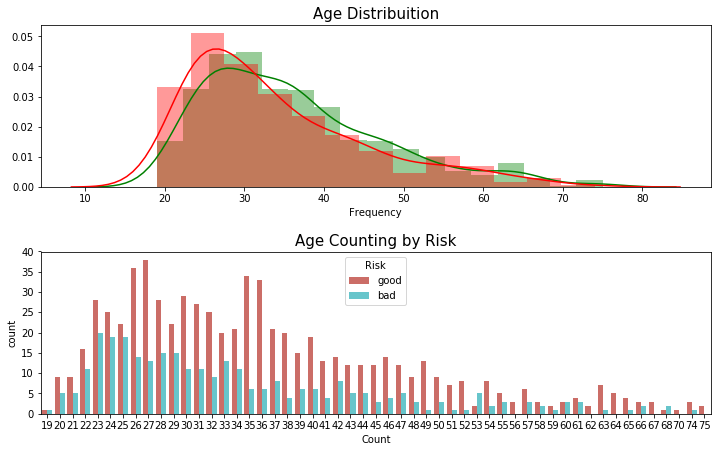

In [12]:
df_good = df_credit[df_credit["Risk"] == 'good']
df_bad = df_credit[df_credit["Risk"] == 'bad']

fig, ax = plt.subplots(nrows=2, figsize=(12,8))
plt.subplots_adjust(hspace = 0.4, top = 0.8)

g1 = sns.distplot(df_good["Age"], ax=ax[0], 
             color="g")
g1 = sns.distplot(df_bad["Age"], ax=ax[0], 
             color='r')
g1.set_title("Age Distribuition", fontsize=15)
g1.set_xlabel("Age")
g1.set_xlabel("Frequency")

g2 = sns.countplot(x="Age",data=df_credit, 
              palette="hls", ax=ax[1], 
              hue = "Risk")
g2.set_title("Age Counting by Risk", fontsize=15)
g2.set_xlabel("Age")
g2.set_xlabel("Count")
plt.show()

In [14]:
#Let's look the Credit Amount column
interval = (18, 25, 35, 60, 120)

cats = ['Student', 'Young', 'Adult', 'Senior']
df_credit["Age_cat"] = pd.cut(df_credit.Age, interval, labels=cats)


df_good = df_credit[df_credit["Risk"] == 'good']
df_bad = df_credit[df_credit["Risk"] == 'bad']

In [15]:
trace0 = go.Box(
    y=df_good["Credit amount"],
    x=df_good["Age_cat"],
    name='Good credit',
    marker=dict(
        color='#3D9970'
    )
)

trace1 = go.Box(
    y=df_bad['Credit amount'],
    x=df_bad['Age_cat'],
    name='Bad credit',
    marker=dict(
        color='#FF4136'
    )
)
    
data = [trace0, trace1]

layout = go.Layout(
    yaxis=dict(
        title='Credit Amount (US Dollar)',
        zeroline=False
    ),
    xaxis=dict(
        title='Age Categorical'
    ),
    boxmode='group'
)
fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='box-age-cat')

In [16]:
#First plot
trace0 = go.Bar(
    x = df_credit[df_credit["Risk"]== 'good']["Housing"].value_counts().index.values,
    y = df_credit[df_credit["Risk"]== 'good']["Housing"].value_counts().values,
    name='Good credit'
)

#Second plot
trace1 = go.Bar(
    x = df_credit[df_credit["Risk"]== 'bad']["Housing"].value_counts().index.values,
    y = df_credit[df_credit["Risk"]== 'bad']["Housing"].value_counts().values,
    name="Bad Credit"
)

data = [trace0, trace1]

layout = go.Layout(
    title='Housing Distribuition'
)


fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='Housing-Grouped')

In [18]:
fig = {
    "data": [
        {
            "type": 'violin',
            "x": df_good['Housing'],
            "y": df_good['Credit amount'],
            "legendgroup": 'Good Credit',
            "scalegroup": 'No',
            "name": 'Good Credit',
            "side": 'negative',
            "box": {
                "visible": True
            },
            "meanline": {
                "visible": True
            },
            "line": {
                "color": 'blue'
            }
        },
        {
            "type": 'violin',
            "x": df_bad['Housing'],
            "y": df_bad['Credit amount'],
            "legendgroup": 'Bad Credit',
            "scalegroup": 'No',
            "name": 'Bad Credit',
            "side": 'positive',
            "box": {
                "visible": True
            },
            "meanline": {
                "visible": True
            },
            "line": {
                "color": 'green'
            }
        }
    ],
    "layout" : {
        "yaxis": {
            "zeroline": False,
        },
        "violingap": 0,
        "violinmode": "overlay"
    }
}

py.iplot(fig, filename = 'violin/split', validate = False)

In [17]:
#First plot
trace0 = go.Bar(
    x = df_credit[df_credit["Risk"]== 'good']["Sex"].value_counts().index.values,
    y = df_credit[df_credit["Risk"]== 'good']["Sex"].value_counts().values,
    name='Good credit'
)

#First plot 2
trace1 = go.Bar(
    x = df_credit[df_credit["Risk"]== 'bad']["Sex"].value_counts().index.values,
    y = df_credit[df_credit["Risk"]== 'bad']["Sex"].value_counts().values,
    name="Bad Credit"
)

#Second plot
trace2 = go.Box(
    x = df_credit[df_credit["Risk"]== 'good']["Sex"],
    y = df_credit[df_credit["Risk"]== 'good']["Credit amount"],
    name=trace0.name
)

#Second plot 2
trace3 = go.Box(
    x = df_credit[df_credit["Risk"]== 'bad']["Sex"],
    y = df_credit[df_credit["Risk"]== 'bad']["Credit amount"],
    name=trace1.name
)

data = [trace0, trace1, trace2,trace3]


fig = tls.make_subplots(rows=1, cols=2, 
                        subplot_titles=('Sex Count', 'Credit Amount by Sex'))

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 1, 2)

fig['layout'].update(height=400, width=800, title='Sex Distribuition', boxmode='group')
py.iplot(fig, filename='sex-subplot')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [19]:
#First plot
trace0 = go.Bar(
    x = df_credit[df_credit["Risk"]== 'good']["Job"].value_counts().index.values,
    y = df_credit[df_credit["Risk"]== 'good']["Job"].value_counts().values,
    name='Good credit Distribuition'
)

#Second plot
trace1 = go.Bar(
    x = df_credit[df_credit["Risk"]== 'bad']["Job"].value_counts().index.values,
    y = df_credit[df_credit["Risk"]== 'bad']["Job"].value_counts().values,
    name="Bad Credit Distribuition"
)

data = [trace0, trace1]

layout = go.Layout(
    title='Job Distribuition'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='grouped-bar')

In [20]:
trace0 = go.Box(
    x=df_good["Job"],
    y=df_good["Credit amount"],
    name='Good credit'
)

trace1 = go.Box(
    x=df_bad['Job'],
    y=df_bad['Credit amount'],
    name='Bad credit'
)
    
data = [trace0, trace1]

layout = go.Layout(
    yaxis=dict(
        title='Credit Amount distribuition by Job'
    ),
    boxmode='group'
)
fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='box-age-cat')

In [21]:
fig = {
    "data": [
        {
            "type": 'violin',
            "x": df_good['Job'],
            "y": df_good['Age'],
            "legendgroup": 'Good Credit',
            "scalegroup": 'No',
            "name": 'Good Credit',
            "side": 'negative',
            "box": {
                "visible": True
            },
            "meanline": {
                "visible": True
            },
            "line": {
                "color": 'blue'
            }
        },
        {
            "type": 'violin',
            "x": df_bad['Job'],
            "y": df_bad['Age'],
            "legendgroup": 'Bad Credit',
            "scalegroup": 'No',
            "name": 'Bad Credit',
            "side": 'positive',
            "box": {
                "visible": True
            },
            "meanline": {
                "visible": True
            },
            "line": {
                "color": 'green'
            }
        }
    ],
    "layout" : {
        "yaxis": {
            "zeroline": False,
        },
        "violingap": 0,
        "violinmode": "overlay"
    }
}


py.iplot(fig, filename = 'Age-Housing', validate = False)

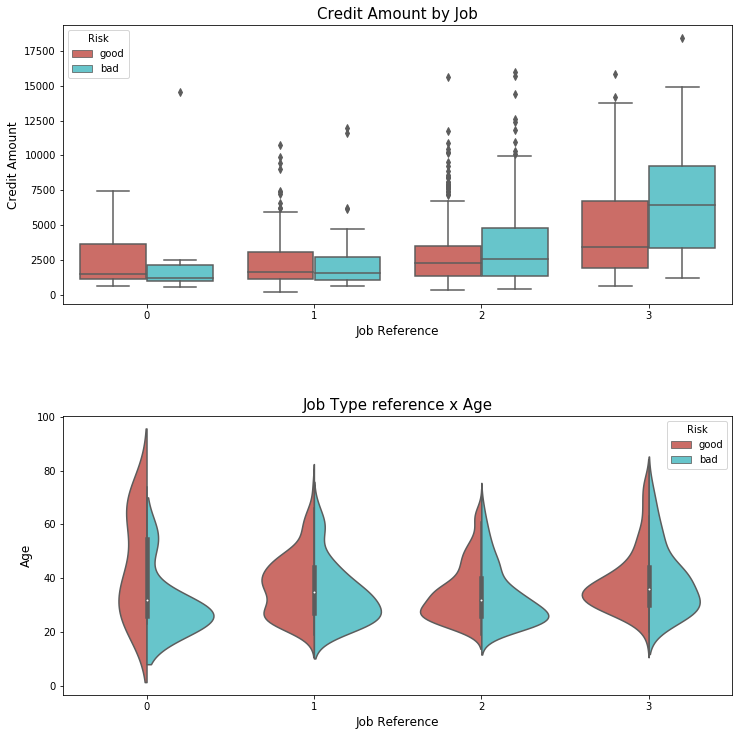

In [22]:
fig, ax = plt.subplots(figsize=(12,12), nrows=2)

g1 = sns.boxplot(x="Job", y="Credit amount", data=df_credit, 
            palette="hls", ax=ax[0], hue="Risk")
g1.set_title("Credit Amount by Job", fontsize=15)
g1.set_xlabel("Job Reference", fontsize=12)
g1.set_ylabel("Credit Amount", fontsize=12)

g2 = sns.violinplot(x="Job", y="Age", data=df_credit, ax=ax[1],  
               hue="Risk", split=True, palette="hls")
g2.set_title("Job Type reference x Age", fontsize=15)
g2.set_xlabel("Job Reference", fontsize=12)
g2.set_ylabel("Age", fontsize=12)

plt.subplots_adjust(hspace = 0.4,top = 0.9)

plt.show()

In [39]:
import plotly.figure_factory as ff

import numpy as np

# Add histogram data
x1 = np.log(df_good['Credit amount']) 
x2 = np.log(df_bad["Credit amount"])

# Group data together
hist_data = [x1, x2]

group_labels = ['Good Credit', 'Bad Credit']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, bin_size=.2)

# Plot!
py.iplot(fig, filename='Distplot with Multiple Datasets')

In [23]:

from plotly import tools
import numpy as np
import plotly.graph_objs as go

count_good = go.Bar(
    x = df_good["Saving accounts"].value_counts().index.values,
    y = df_good["Saving accounts"].value_counts().values,
    name='Good credit'
)
count_bad = go.Bar(
    x = df_bad["Saving accounts"].value_counts().index.values,
    y = df_bad["Saving accounts"].value_counts().values,
    name='Bad credit'
)


box_1 = go.Box(
    x=df_good["Saving accounts"],
    y=df_good["Credit amount"],
    name='Good credit'
)
box_2 = go.Box(
    x=df_bad["Saving accounts"],
    y=df_bad["Credit amount"],
    name='Bad credit'
)

scat_1 = go.Box(
    x=df_good["Saving accounts"],
    y=df_good["Age"],
    name='Good credit'
)
scat_2 = go.Box(
    x=df_bad["Saving accounts"],
    y=df_bad["Age"],
    name='Bad credit'
)

data = [scat_1, scat_2, box_1, box_2, count_good, count_bad]

fig = tools.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                          subplot_titles=('Count Saving Accounts','Credit Amount by Savings Acc', 
                                          'Age by Saving accounts'))

fig.append_trace(count_good, 1, 1)
fig.append_trace(count_bad, 1, 1)

fig.append_trace(box_2, 1, 2)
fig.append_trace(box_1, 1, 2)

fig.append_trace(scat_1, 2, 1)
fig.append_trace(scat_2, 2, 1)



fig['layout'].update(height=700, width=800, title='Saving Accounts Exploration', boxmode='group')

py.iplot(fig, filename='combined-savings')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]
[ (2,1) x3,y3           -      ]



In [29]:
def one_hot_encoder(df, nan_as_category = False):
    original_columns = list(df.columns)
    categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns= categorical_columns, dummy_na= nan_as_category, drop_first=True)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns

In [30]:
df_credit['Saving accounts'] = df_credit['Saving accounts'].fillna('no_inf')
df_credit['Checking account'] = df_credit['Checking account'].fillna('no_inf')

#Purpose to Dummies Variable
df_credit = df_credit.merge(pd.get_dummies(df_credit.Purpose, drop_first=True, prefix='Purpose'), left_index=True, right_index=True)
#Sex feature in dummies
df_credit = df_credit.merge(pd.get_dummies(df_credit.Sex, drop_first=True, prefix='Sex'), left_index=True, right_index=True)
# Housing get dummies
df_credit = df_credit.merge(pd.get_dummies(df_credit.Housing, drop_first=True, prefix='Housing'), left_index=True, right_index=True)
# Housing get Saving Accounts
df_credit = df_credit.merge(pd.get_dummies(df_credit["Saving accounts"], drop_first=True, prefix='Savings'), left_index=True, right_index=True)
# Housing get Risk
df_credit = df_credit.merge(pd.get_dummies(df_credit.Risk, prefix='Risk'), left_index=True, right_index=True)
# Housing get Checking Account
df_credit = df_credit.merge(pd.get_dummies(df_credit["Checking account"], drop_first=True, prefix='Check'), left_index=True, right_index=True)
# Housing get Age categorical
df_credit = df_credit.merge(pd.get_dummies(df_credit["Age_cat"], drop_first=True, prefix='Age_cat'), left_index=True, right_index=True)

In [31]:
#Excluding the missing columns
del df_credit["Saving accounts"]
del df_credit["Checking account"]
del df_credit["Purpose"]
del df_credit["Sex"]
del df_credit["Housing"]
del df_credit["Age_cat"]
del df_credit["Risk"]
del df_credit['Risk_good']

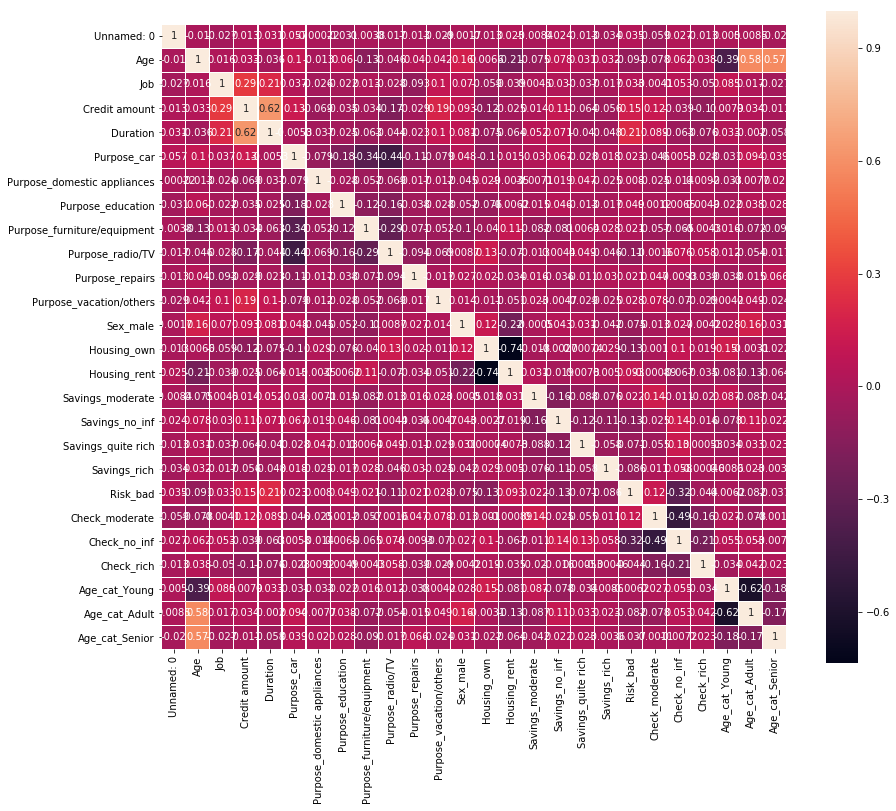

In [39]:
plt.figure(figsize=(14,12))
sns.heatmap(df_credit.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True,  linecolor='white', annot=True)
plt.show()

In [41]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score # to split the data
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score #To evaluate our model

from sklearn.model_selection import GridSearchCV

# Algorithmns models to be compared
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [42]:
df_credit['Credit amount'] = np.log(df_credit['Credit amount'])

In [43]:
#Creating the X and y variables
X = df_credit.drop('Risk_bad', 1).values
y = df_credit["Risk_bad"].values

# Spliting X and y into train and test version
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

C:\Users\partheban\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\partheban\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\partheban\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\partheban\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\partheban\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\partheban\Anacon

LR: 0.387574 (0.077970)
LDA: 0.418790 (0.082453)
KNN: 0.240532 (0.098844)
CART: 0.514957 (0.128782)
NB: 0.591679 (0.071111)


C:\Users\partheban\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

C:\Users\partheban\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

C:\Users\partheban\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

C:\Users\partheban\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

C:\Users\partheban\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

C:\Users\partheban\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarni

RF: 0.305845 (0.119364)
SVM: 0.008711 (0.017889)


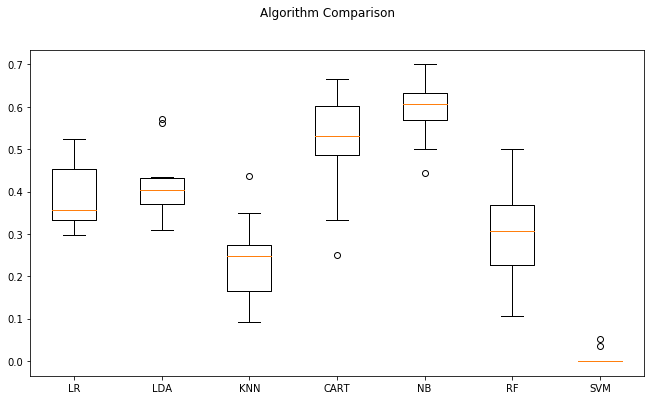

In [45]:
# to feed the random state
seed = 7

# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC(gamma='auto')))


# evaluate each model in turn
results = []
names = []
scoring = 'recall'

for name, model in models:
        kfold = KFold(n_splits=10, random_state=seed)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
# boxplot algorithm comparison
fig = plt.figure(figsize=(11,6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [46]:
#Seting the Hyper Parameters
param_grid = {"max_depth": [3,5, 7, 10,None],
              "n_estimators":[3,5,10,25,50,150],
              "max_features": [4,7,15,20]}

#Creating the classifier
model = RandomForestClassifier(random_state=2)

grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='recall', verbose=4)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV] max_depth=3, max_features=4, n_estimators=3 .....................
[CV]  max_depth=3, max_features=4, n_estimators=3, score=0.021739130434782608, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimators=3 .....................
[CV]  max_depth=3, max_features=4, n_estimators=3, score=0.10869565217391304, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimators=3 .....................
[CV]  max_depth=3, max_features=4, n_estimators=3, score=0.15217391304347827, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimators=3 .....................
[CV]  max_depth=3, max_features=4, n_estimators=3, score=0.13333333333333333, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimators=3 .....................
[CV]  max_depth=3, max_features=4, n_estimators=3, score=0.13333333333333333, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimators=5 .....................
[CV]  max_depth=3, max_features=4, n_estimators=5,

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV]  max_depth=3, max_features=4, n_estimators=10, score=0.08888888888888889, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimators=10 ....................
[CV]  max_depth=3, max_features=4, n_estimators=10, score=0.044444444444444446, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimators=25 ....................
[CV]  max_depth=3, max_features=4, n_estimators=25, score=0.06521739130434782, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimators=25 ....................
[CV]  max_depth=3, max_features=4, n_estimators=25, score=0.10869565217391304, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimators=25 ....................
[CV]  max_depth=3, max_features=4, n_estimators=25, score=0.08695652173913043, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimators=25 ....................
[CV]  max_depth=3, max_features=4, n_estimators=25, score=0.06666666666666667, total=   0.0s
[CV] max_depth=3, max_features=4, n_estimators=25 ....................
[CV]  max_depth

[CV] max_depth=3, max_features=15, n_estimators=10 ...................
[CV]  max_depth=3, max_features=15, n_estimators=10, score=0.10869565217391304, total=   0.0s
[CV] max_depth=3, max_features=15, n_estimators=10 ...................
[CV]  max_depth=3, max_features=15, n_estimators=10, score=0.2826086956521739, total=   0.0s
[CV] max_depth=3, max_features=15, n_estimators=10 ...................
[CV]  max_depth=3, max_features=15, n_estimators=10, score=0.1956521739130435, total=   0.0s
[CV] max_depth=3, max_features=15, n_estimators=10 ...................
[CV]  max_depth=3, max_features=15, n_estimators=10, score=0.2222222222222222, total=   0.0s
[CV] max_depth=3, max_features=15, n_estimators=10 ...................
[CV]  max_depth=3, max_features=15, n_estimators=10, score=0.13333333333333333, total=   0.0s
[CV] max_depth=3, max_features=15, n_estimators=25 ...................
[CV]  max_depth=3, max_features=15, n_estimators=25, score=0.17391304347826086, total=   0.0s
[CV] max_dept

[CV]  max_depth=5, max_features=4, n_estimators=10, score=0.2826086956521739, total=   0.0s
[CV] max_depth=5, max_features=4, n_estimators=10 ....................
[CV]  max_depth=5, max_features=4, n_estimators=10, score=0.17391304347826086, total=   0.0s
[CV] max_depth=5, max_features=4, n_estimators=10 ....................
[CV]  max_depth=5, max_features=4, n_estimators=10, score=0.1111111111111111, total=   0.0s
[CV] max_depth=5, max_features=4, n_estimators=10 ....................
[CV]  max_depth=5, max_features=4, n_estimators=10, score=0.13333333333333333, total=   0.0s
[CV] max_depth=5, max_features=4, n_estimators=25 ....................
[CV]  max_depth=5, max_features=4, n_estimators=25, score=0.08695652173913043, total=   0.0s
[CV] max_depth=5, max_features=4, n_estimators=25 ....................
[CV]  max_depth=5, max_features=4, n_estimators=25, score=0.2608695652173913, total=   0.0s
[CV] max_depth=5, max_features=4, n_estimators=25 ....................
[CV]  max_depth=5, 

[CV]  max_depth=5, max_features=15, n_estimators=5, score=0.4222222222222222, total=   0.0s
[CV] max_depth=5, max_features=15, n_estimators=10 ...................
[CV]  max_depth=5, max_features=15, n_estimators=10, score=0.32608695652173914, total=   0.0s
[CV] max_depth=5, max_features=15, n_estimators=10 ...................
[CV]  max_depth=5, max_features=15, n_estimators=10, score=0.3695652173913043, total=   0.0s
[CV] max_depth=5, max_features=15, n_estimators=10 ...................
[CV]  max_depth=5, max_features=15, n_estimators=10, score=0.34782608695652173, total=   0.0s
[CV] max_depth=5, max_features=15, n_estimators=10 ...................
[CV]  max_depth=5, max_features=15, n_estimators=10, score=0.3333333333333333, total=   0.0s
[CV] max_depth=5, max_features=15, n_estimators=10 ...................
[CV]  max_depth=5, max_features=15, n_estimators=10, score=0.4, total=   0.0s
[CV] max_depth=5, max_features=15, n_estimators=25 ...................
[CV]  max_depth=5, max_feature

[CV]  max_depth=7, max_features=4, n_estimators=10, score=0.21739130434782608, total=   0.0s
[CV] max_depth=7, max_features=4, n_estimators=10 ....................
[CV]  max_depth=7, max_features=4, n_estimators=10, score=0.17777777777777778, total=   0.0s
[CV] max_depth=7, max_features=4, n_estimators=10 ....................
[CV]  max_depth=7, max_features=4, n_estimators=10, score=0.2222222222222222, total=   0.0s
[CV] max_depth=7, max_features=4, n_estimators=25 ....................
[CV]  max_depth=7, max_features=4, n_estimators=25, score=0.15217391304347827, total=   0.0s
[CV] max_depth=7, max_features=4, n_estimators=25 ....................
[CV]  max_depth=7, max_features=4, n_estimators=25, score=0.34782608695652173, total=   0.0s
[CV] max_depth=7, max_features=4, n_estimators=25 ....................
[CV]  max_depth=7, max_features=4, n_estimators=25, score=0.2391304347826087, total=   0.0s
[CV] max_depth=7, max_features=4, n_estimators=25 ....................
[CV]  max_depth=7,

[CV]  max_depth=7, max_features=15, n_estimators=5, score=0.43478260869565216, total=   0.0s
[CV] max_depth=7, max_features=15, n_estimators=5 ....................
[CV]  max_depth=7, max_features=15, n_estimators=5, score=0.37777777777777777, total=   0.0s
[CV] max_depth=7, max_features=15, n_estimators=5 ....................
[CV]  max_depth=7, max_features=15, n_estimators=5, score=0.37777777777777777, total=   0.0s
[CV] max_depth=7, max_features=15, n_estimators=10 ...................
[CV]  max_depth=7, max_features=15, n_estimators=10, score=0.34782608695652173, total=   0.0s
[CV] max_depth=7, max_features=15, n_estimators=10 ...................
[CV]  max_depth=7, max_features=15, n_estimators=10, score=0.3695652173913043, total=   0.0s
[CV] max_depth=7, max_features=15, n_estimators=10 ...................
[CV]  max_depth=7, max_features=15, n_estimators=10, score=0.34782608695652173, total=   0.0s
[CV] max_depth=7, max_features=15, n_estimators=10 ...................
[CV]  max_dept

[CV]  max_depth=7, max_features=20, n_estimators=150, score=0.43478260869565216, total=   0.4s
[CV] max_depth=7, max_features=20, n_estimators=150 ..................
[CV]  max_depth=7, max_features=20, n_estimators=150, score=0.35555555555555557, total=   0.5s
[CV] max_depth=7, max_features=20, n_estimators=150 ..................
[CV]  max_depth=7, max_features=20, n_estimators=150, score=0.4888888888888889, total=   0.5s
[CV] max_depth=10, max_features=4, n_estimators=3 ....................
[CV]  max_depth=10, max_features=4, n_estimators=3, score=0.2391304347826087, total=   0.0s
[CV] max_depth=10, max_features=4, n_estimators=3 ....................
[CV]  max_depth=10, max_features=4, n_estimators=3, score=0.34782608695652173, total=   0.0s
[CV] max_depth=10, max_features=4, n_estimators=3 ....................
[CV]  max_depth=10, max_features=4, n_estimators=3, score=0.32608695652173914, total=   0.0s
[CV] max_depth=10, max_features=4, n_estimators=3 ....................
[CV]  max_de

[CV]  max_depth=10, max_features=7, n_estimators=25, score=0.4444444444444444, total=   0.0s
[CV] max_depth=10, max_features=7, n_estimators=50 ...................
[CV]  max_depth=10, max_features=7, n_estimators=50, score=0.34782608695652173, total=   0.0s
[CV] max_depth=10, max_features=7, n_estimators=50 ...................
[CV]  max_depth=10, max_features=7, n_estimators=50, score=0.391304347826087, total=   0.0s
[CV] max_depth=10, max_features=7, n_estimators=50 ...................
[CV]  max_depth=10, max_features=7, n_estimators=50, score=0.43478260869565216, total=   0.0s
[CV] max_depth=10, max_features=7, n_estimators=50 ...................
[CV]  max_depth=10, max_features=7, n_estimators=50, score=0.4, total=   0.0s
[CV] max_depth=10, max_features=7, n_estimators=50 ...................
[CV]  max_depth=10, max_features=7, n_estimators=50, score=0.4444444444444444, total=   0.0s
[CV] max_depth=10, max_features=7, n_estimators=150 ..................
[CV]  max_depth=10, max_featur

[CV]  max_depth=10, max_features=20, n_estimators=10, score=0.5, total=   0.0s
[CV] max_depth=10, max_features=20, n_estimators=10 ..................
[CV]  max_depth=10, max_features=20, n_estimators=10, score=0.3333333333333333, total=   0.0s
[CV] max_depth=10, max_features=20, n_estimators=10 ..................
[CV]  max_depth=10, max_features=20, n_estimators=10, score=0.5333333333333333, total=   0.0s
[CV] max_depth=10, max_features=20, n_estimators=25 ..................
[CV]  max_depth=10, max_features=20, n_estimators=25, score=0.43478260869565216, total=   0.0s
[CV] max_depth=10, max_features=20, n_estimators=25 ..................
[CV]  max_depth=10, max_features=20, n_estimators=25, score=0.4782608695652174, total=   0.0s
[CV] max_depth=10, max_features=20, n_estimators=25 ..................
[CV]  max_depth=10, max_features=20, n_estimators=25, score=0.41304347826086957, total=   0.0s
[CV] max_depth=10, max_features=20, n_estimators=25 ..................
[CV]  max_depth=10, max

[CV]  max_depth=None, max_features=7, n_estimators=5, score=0.3111111111111111, total=   0.0s
[CV] max_depth=None, max_features=7, n_estimators=5 ..................
[CV]  max_depth=None, max_features=7, n_estimators=5, score=0.5111111111111111, total=   0.0s
[CV] max_depth=None, max_features=7, n_estimators=10 .................
[CV]  max_depth=None, max_features=7, n_estimators=10, score=0.2826086956521739, total=   0.0s
[CV] max_depth=None, max_features=7, n_estimators=10 .................
[CV]  max_depth=None, max_features=7, n_estimators=10, score=0.30434782608695654, total=   0.0s
[CV] max_depth=None, max_features=7, n_estimators=10 .................
[CV]  max_depth=None, max_features=7, n_estimators=10, score=0.45652173913043476, total=   0.0s
[CV] max_depth=None, max_features=7, n_estimators=10 .................
[CV]  max_depth=None, max_features=7, n_estimators=10, score=0.2222222222222222, total=   0.0s
[CV] max_depth=None, max_features=7, n_estimators=10 .................
[CV]

[CV]  max_depth=None, max_features=15, n_estimators=150, score=0.4, total=   0.4s
[CV] max_depth=None, max_features=15, n_estimators=150 ...............
[CV]  max_depth=None, max_features=15, n_estimators=150, score=0.5111111111111111, total=   0.4s
[CV] max_depth=None, max_features=20, n_estimators=3 .................
[CV]  max_depth=None, max_features=20, n_estimators=3, score=0.5, total=   0.0s
[CV] max_depth=None, max_features=20, n_estimators=3 .................
[CV]  max_depth=None, max_features=20, n_estimators=3, score=0.5217391304347826, total=   0.0s
[CV] max_depth=None, max_features=20, n_estimators=3 .................
[CV]  max_depth=None, max_features=20, n_estimators=3, score=0.5217391304347826, total=   0.0s
[CV] max_depth=None, max_features=20, n_estimators=3 .................
[CV]  max_depth=None, max_features=20, n_estimators=3, score=0.3333333333333333, total=   0.0s
[CV] max_depth=None, max_features=20, n_estimators=3 .................
[CV]  max_depth=None, max_feat

[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:  1.3min finished
C:\Users\partheban\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=2, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [3, 5, 7, 10, None], 'n_estimators': [3, 5, 10, 25, 50, 150], 'max_features': [4, 7, 15, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=4)

In [48]:
print(grid_search.best_score_)
print(grid_search.best_params_)

0.4911884057971015
{'max_depth': None, 'max_features': 20, 'n_estimators': 5}


In [49]:
rf = RandomForestClassifier(max_depth=None, max_features=10, n_estimators=15, random_state=2)

#trainning with the best params
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=None,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

In [50]:

#Testing the model 
#Predicting using our  model
y_pred = rf.predict(X_test)

# Verificaar os resultados obtidos
print(accuracy_score(y_test,y_pred))
print("\n")
print(confusion_matrix(y_test, y_pred))
print("\n")
print(fbeta_score(y_test, y_pred, beta=2))

0.744


[[159  19]
 [ 45  27]]


0.40419161676646703


In [51]:
from sklearn.utils import resample
from sklearn.metrics import roc_curve

In [52]:
# Criando o classificador logreg
GNB = GaussianNB()

# Fitting with train data
model = GNB.fit(X_train, y_train)

In [53]:
# Printing the Training Score
print("Training score data: ")
print(model.score(X_train, y_train))

Training score data: 
0.704


In [54]:
y_pred = model.predict(X_test)

print(accuracy_score(y_test,y_pred))
print("\n")
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))

0.644


[[124  54]
 [ 35  37]]


              precision    recall  f1-score   support

           0       0.78      0.70      0.74       178
           1       0.41      0.51      0.45        72

   micro avg       0.64      0.64      0.64       250
   macro avg       0.59      0.61      0.59       250
weighted avg       0.67      0.64      0.65       250



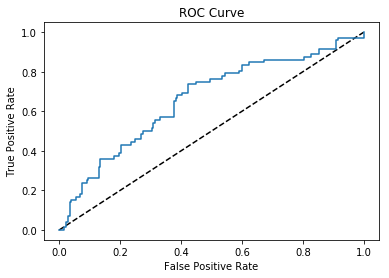

In [56]:

#Predicting proba
y_pred_prob = model.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()